## Feature Engineering: Notebook

In [1]:
# Import depdencies for data processing
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Import feature engineering instances 
from feature_engineering import FeatureEncoder
from feature_engineering import FeatureScaler

In [2]:
# Show all columns
pd.set_option("display.max.columns", 40)

## Feature Engineering: Approach

+ Feature Analysis: analyse the type of features, kind of features 
+ Feature Scaling
+ Feature Encoding

## Feature Analysis

In [3]:
# Import depdencies for creating feature analsyis
from feature_engineering import data_loader
from feature_engineering import correlation_graph, correlation_map

In [4]:
path = "C:\Development\Projects\MachineLearning\Laptop-Price-Predictor-System\dataset"
ds = data_loader(path, file_index=2)
ds

{0: 'ebay_laptop_dataset.csv', 1: 'ebay_laptop_data_cleaned.csv', 2: 'ebay_laptop_data_phase3.csv', 3: 'ebay_laptop_data_recognised.csv', 4: 'ebay_laptop_data_unrecognised.csv', 5: 'test.ipynb'}


,Brand,Price,Color,GPU,Processor Speed,Display Width,Display Height,OS,Storage Type,Hard Drive Capacity,SSD Capacity,Screen Size (cm),Ram Size,Price per Screen Size,Price per Display Height,Price per Display Width,Bluetooth,Touchscreen,WiFi,Webcam
0,dell,400.00,black,intel,4.200000,1920.000000,1080.000000,windows,ssd,2000.00,205.95,14.000000,5.98,28.571429,0.370370,0.208333,Yes,No,Yes,Yes
1,dell,175.00,black,intel,2.400000,1920.000000,1080.000000,windows,ssd,500.00,500.00,14.000000,16.00,12.500000,0.162037,0.091146,Yes,Yes,Yes,Yes
2,hp,85.00,black,intel,2.400000,1366.000000,768.000000,chrome,emmc,16.00,205.95,11.600000,4.00,7.327586,0.110677,0.062225,Yes,No,Yes,Yes
3,dell,101.25,other,other,1.400000,1366.000000,768.000000,windows,ssd,98.89,256.00,12.500000,8.00,8.100000,0.131836,0.074122,No,No,Yes,Yes
4,acer,50.00,black,other,1.600000,1366.000000,768.000000,chrome,ssd,98.89,16.00,11.600000,4.00,4.310345,0.065104,0.036603,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,dell,429.00,black,intel,2.600000,1280.000000,720.000000,windows,unknown,98.89,960.00,14.000000,5.98,30.642857,0.595833,0.335156,No,No,Yes,No
2467,acer,93.25,other,other,1.186174,779.242171,447.949319,unknown,unknown,98.89,205.95,9.076586,5.98,10.273686,0.208171,0.119668,No,No,No,No
2468,dell,424.80,black,intel,2.800000,1920.000000,1080.000000,windows,unknown,98.89,120.00,12.500000,5.98,33.984000,0.393333,0.221250,Yes,Yes,Yes,Yes
2469,hp,90.94,other,other,1.186174,779.242171,447.949319,unknown,unknown,98.89,205.95,9.076586,5.98,10.019185,0.203014,0.116703,No,No,No,No


In [5]:
# Split features into numerical and categorical features 
ds_num = ds.select_dtypes([int, float])
ds_cat = ds.select_dtypes([object])

In [6]:
ds_cat["Bluetooth"].nunique()

2

In [7]:
# categorical features: Identify number of unique values
binary_features = []
multi_features = []
nuniques_list = []

# Iteration: Distinguish categorical features into binary and non-binary (multivariate)
for feature in ds_cat.columns:
    feature_data = ds_cat[feature]
    num_uniques = feature_data.nunique()

    # Check if the feature is binary or multivariate    
    if num_uniques == 2:
        binary_features.append(feature)
    elif num_uniques > 2:
        multi_features.append(feature)
    else:
        print("Feature is null")

    # add number of uniques
    nuniques_list.append((feature, num_uniques))

# Create a unique dataframe 
unique_df = pd.DataFrame(nuniques_list)

# Show binary and multivariate features 
print(f"Binary features: {binary_features}")
print(f"Multivariate features: {multi_features}")

Binary features: ['Bluetooth', 'Touchscreen', 'WiFi', 'Webcam']
Multivariate features: ['Brand', 'Color', 'GPU', 'OS', 'Storage Type']


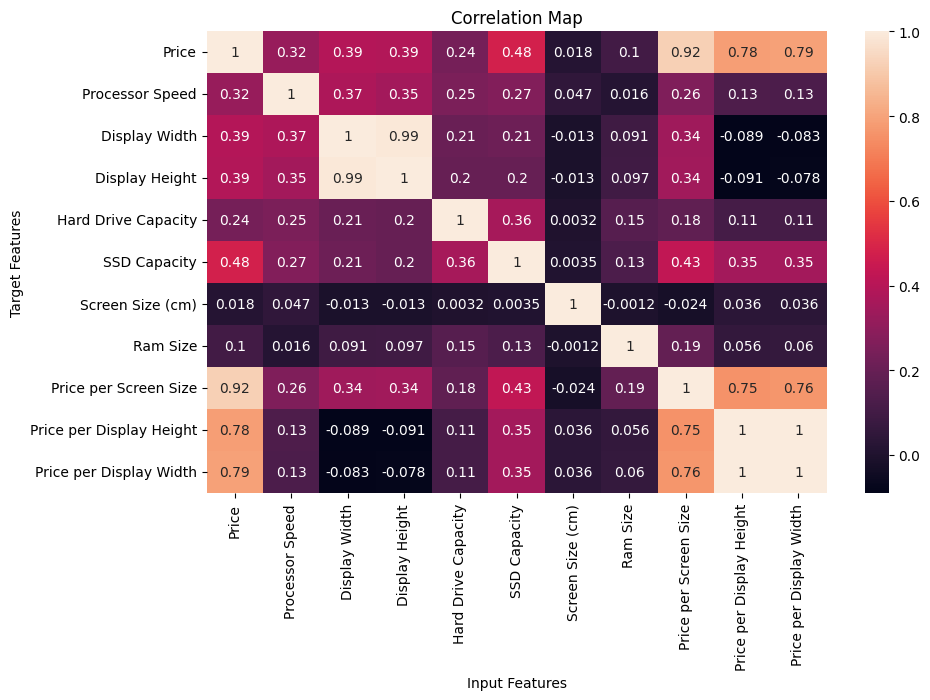

In [8]:
# Show the correlation matrix map
correlation_map(ds_num)

## Feature Encoding

In [9]:
# Show the unique dataframe
unique_df.columns = ["Categorical Features", "#Unique values"]
unique_df.transpose()

,0,1,2,3,4,5,6,7,8
Categorical Features,Brand,Color,GPU,OS,Storage Type,Bluetooth,Touchscreen,WiFi,Webcam
#Unique values,9,20,5,5,5,2,2,2,2


In [10]:
# Create object for encoding feature 
encoder = FeatureEncoder("LabelEncoder")

# Encode feature with LabelEncoder
ds_cat["Touchscreen"] = encoder.transform(ds_cat[["Touchscreen"]])
ds_cat["WiFi"] = encoder.transform(ds_cat[["WiFi"]])
ds_cat["Webcam"] = encoder.transform(ds_cat[["Webcam"]])
ds_cat["Bluetooth"] = encoder.transform(ds_cat[["Bluetooth"]])

Feature encoding is successfull
Feature encoding is successfull
Feature encoding is successfull
Feature encoding is successfull


c:\Development\Projects\MachineLearning\Laptop-Price-Predictor-System\.mlenv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Development\Projects\MachineLearning\Laptop-Price-Predictor-System\.mlenv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Development\Projects\MachineLearning\Laptop-Price-Predictor-System\.mlenv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Development\Projects\MachineLearni

In [11]:
df_cat1 = ds_cat.copy()
df_cat1

,Brand,Color,GPU,OS,Storage Type,Bluetooth,Touchscreen,WiFi,Webcam
0,dell,black,intel,windows,ssd,1,0,1,1
1,dell,black,intel,windows,ssd,1,1,1,1
2,hp,black,intel,chrome,emmc,1,0,1,1
3,dell,other,other,windows,ssd,0,0,1,1
4,acer,black,other,chrome,ssd,1,1,0,0
...,...,...,...,...,...,...,...,...,...
2466,dell,black,intel,windows,unknown,0,0,1,0
2467,acer,other,other,unknown,unknown,0,0,0,0
2468,dell,black,intel,windows,unknown,1,1,1,1
2469,hp,other,other,unknown,unknown,0,0,0,0


In [12]:
# Identify the distribution of categorical feature data: GPU, OS and Storage Type (before replacement)
# ds_cat["GPU"].value_counts() 
# ds_cat["OS"].value_counts()
ds_cat["Storage Type"].value_counts()

Storage Type
ssd        1240
unknown     879
hdd/ssd     172
emmc        145
other        35
Name: count, dtype: int64

The most appearant data for each feature as shown: 
+ GPU: intel
+ OS: Windows
+ Storage Type: SSD

The data with its high frequency will be considered for replacing irrelevant data in order to increase the volume of the dataset
This step will be demonstrated in this code below: 

In [13]:
# # Replace irrelevant data (s.a. others, unknown, etc. ) by data with its high frequency
ds_cat["GPU"] = ds_cat["GPU"].str.replace("other", "intel")
ds_cat["OS"] = ds_cat["OS"].str.replace("unknown", "Windows")
ds_cat["Storage Type"] = ds_cat["Storage Type"].str.replace("unknown", "ssd")

# Identify the distribution of categorical feature data: GPU, OS and Storage Type (after replacement)
ds_cat["GPU"].value_counts() 
# ds_cat["OS"].value_counts()
# ds_cat["Storage Type"].value_counts()

GPU
intel     2228
nvidia     144
amd         96
mali         3
Name: count, dtype: int64

In [14]:
# Create a categorical feature list including: GPU, OS and Storage Type
cat_features = ["GPU", "OS", "Storage Type"]

# Encode these features using OneHotEncoder
oht_encoder = FeatureEncoder("OneHotEncoder")

# Encode feature with OneHotEncoder
oht_cat_encoded = oht_encoder.transform(df_cat1, feature_names=cat_features)
# oht_cat_encoded
GPU_feature_data = oht_encoder.transform(ds_cat, feature_names=[cat_features[0]])
OS_feature_data = oht_encoder.transform(ds_cat, feature_names=[cat_features[1]])
ST_feature_data = oht_encoder.transform(ds_cat, feature_names=[cat_features[2]])
# Color_feature_data = oht_encoder.transform(ds_cat, feature_names=["Color"])

# Show the single categorical feature 
GPU_feature_data

Feature encoding has successfully accomplished
Feature encoding has successfully accomplished
Feature encoding has successfully accomplished
Feature encoding has successfully accomplished


,GPU_amd,GPU_intel,GPU_mali,GPU_nvidia
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
2466,0.0,1.0,0.0,0.0
2467,0.0,1.0,0.0,0.0
2468,0.0,1.0,0.0,0.0
2469,0.0,1.0,0.0,0.0


In [15]:
# Color feature 
color_feature = ds_cat[["Color"]]
num_colors = color_feature["Color"].nunique()

color_dict = {color: i + 1 for i, color in enumerate(color_feature["Color"].unique())}
ds_cat["Color"] = ds_cat["Color"].map(color_dict)
ds_cat["Color"].value_counts()


Color
2     1170
1      737
4      280
3      158
8       42
6       29
13      15
7        7
12       6
5        6
14       5
10       4
9        3
18       2
17       2
11       1
16       1
15       1
19       1
20       1
Name: count, dtype: int64

In [16]:
# Combine all engineered categorical features all together 
ds_cat = pd.concat([ds_cat, 
                    GPU_feature_data, 
                    OS_feature_data, 
                    ST_feature_data, 
                    ], axis=1)
ds_cat = ds_cat.drop(columns=["GPU", "OS", "Storage Type"])
ds_cat

,Brand,Color,Bluetooth,Touchscreen,WiFi,Webcam,GPU_amd,GPU_intel,GPU_mali,GPU_nvidia,OS_Windows,OS_android,OS_chrome,OS_linux,OS_windows,Storage Type_emmc,Storage Type_hdd/ssd,Storage Type_other,Storage Type_ssd
0,dell,1,1,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,dell,1,1,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,hp,1,1,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,dell,2,0,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,acer,1,1,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,dell,1,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2467,acer,2,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2468,dell,1,1,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2469,hp,2,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
# save categorical dataset as fe_categorical_features.csv
ds_cat.to_csv("fe_cat_features.csv")

## Feature Scaling

+ Feature Numerical Analysis: Analyse distribution per feature 
+ Feature Scaling: using MinMax or StandardScaler

In [18]:
# Show the numeric dataset 
ds_num

,Price,Processor Speed,Display Width,Display Height,Hard Drive Capacity,SSD Capacity,Screen Size (cm),Ram Size,Price per Screen Size,Price per Display Height,Price per Display Width
0,400.00,4.200000,1920.000000,1080.000000,2000.00,205.95,14.000000,5.98,28.571429,0.370370,0.208333
1,175.00,2.400000,1920.000000,1080.000000,500.00,500.00,14.000000,16.00,12.500000,0.162037,0.091146
2,85.00,2.400000,1366.000000,768.000000,16.00,205.95,11.600000,4.00,7.327586,0.110677,0.062225
3,101.25,1.400000,1366.000000,768.000000,98.89,256.00,12.500000,8.00,8.100000,0.131836,0.074122
4,50.00,1.600000,1366.000000,768.000000,98.89,16.00,11.600000,4.00,4.310345,0.065104,0.036603
...,...,...,...,...,...,...,...,...,...,...,...
2466,429.00,2.600000,1280.000000,720.000000,98.89,960.00,14.000000,5.98,30.642857,0.595833,0.335156
2467,93.25,1.186174,779.242171,447.949319,98.89,205.95,9.076586,5.98,10.273686,0.208171,0.119668
2468,424.80,2.800000,1920.000000,1080.000000,98.89,120.00,12.500000,5.98,33.984000,0.393333,0.221250
2469,90.94,1.186174,779.242171,447.949319,98.89,205.95,9.076586,5.98,10.019185,0.203014,0.116703


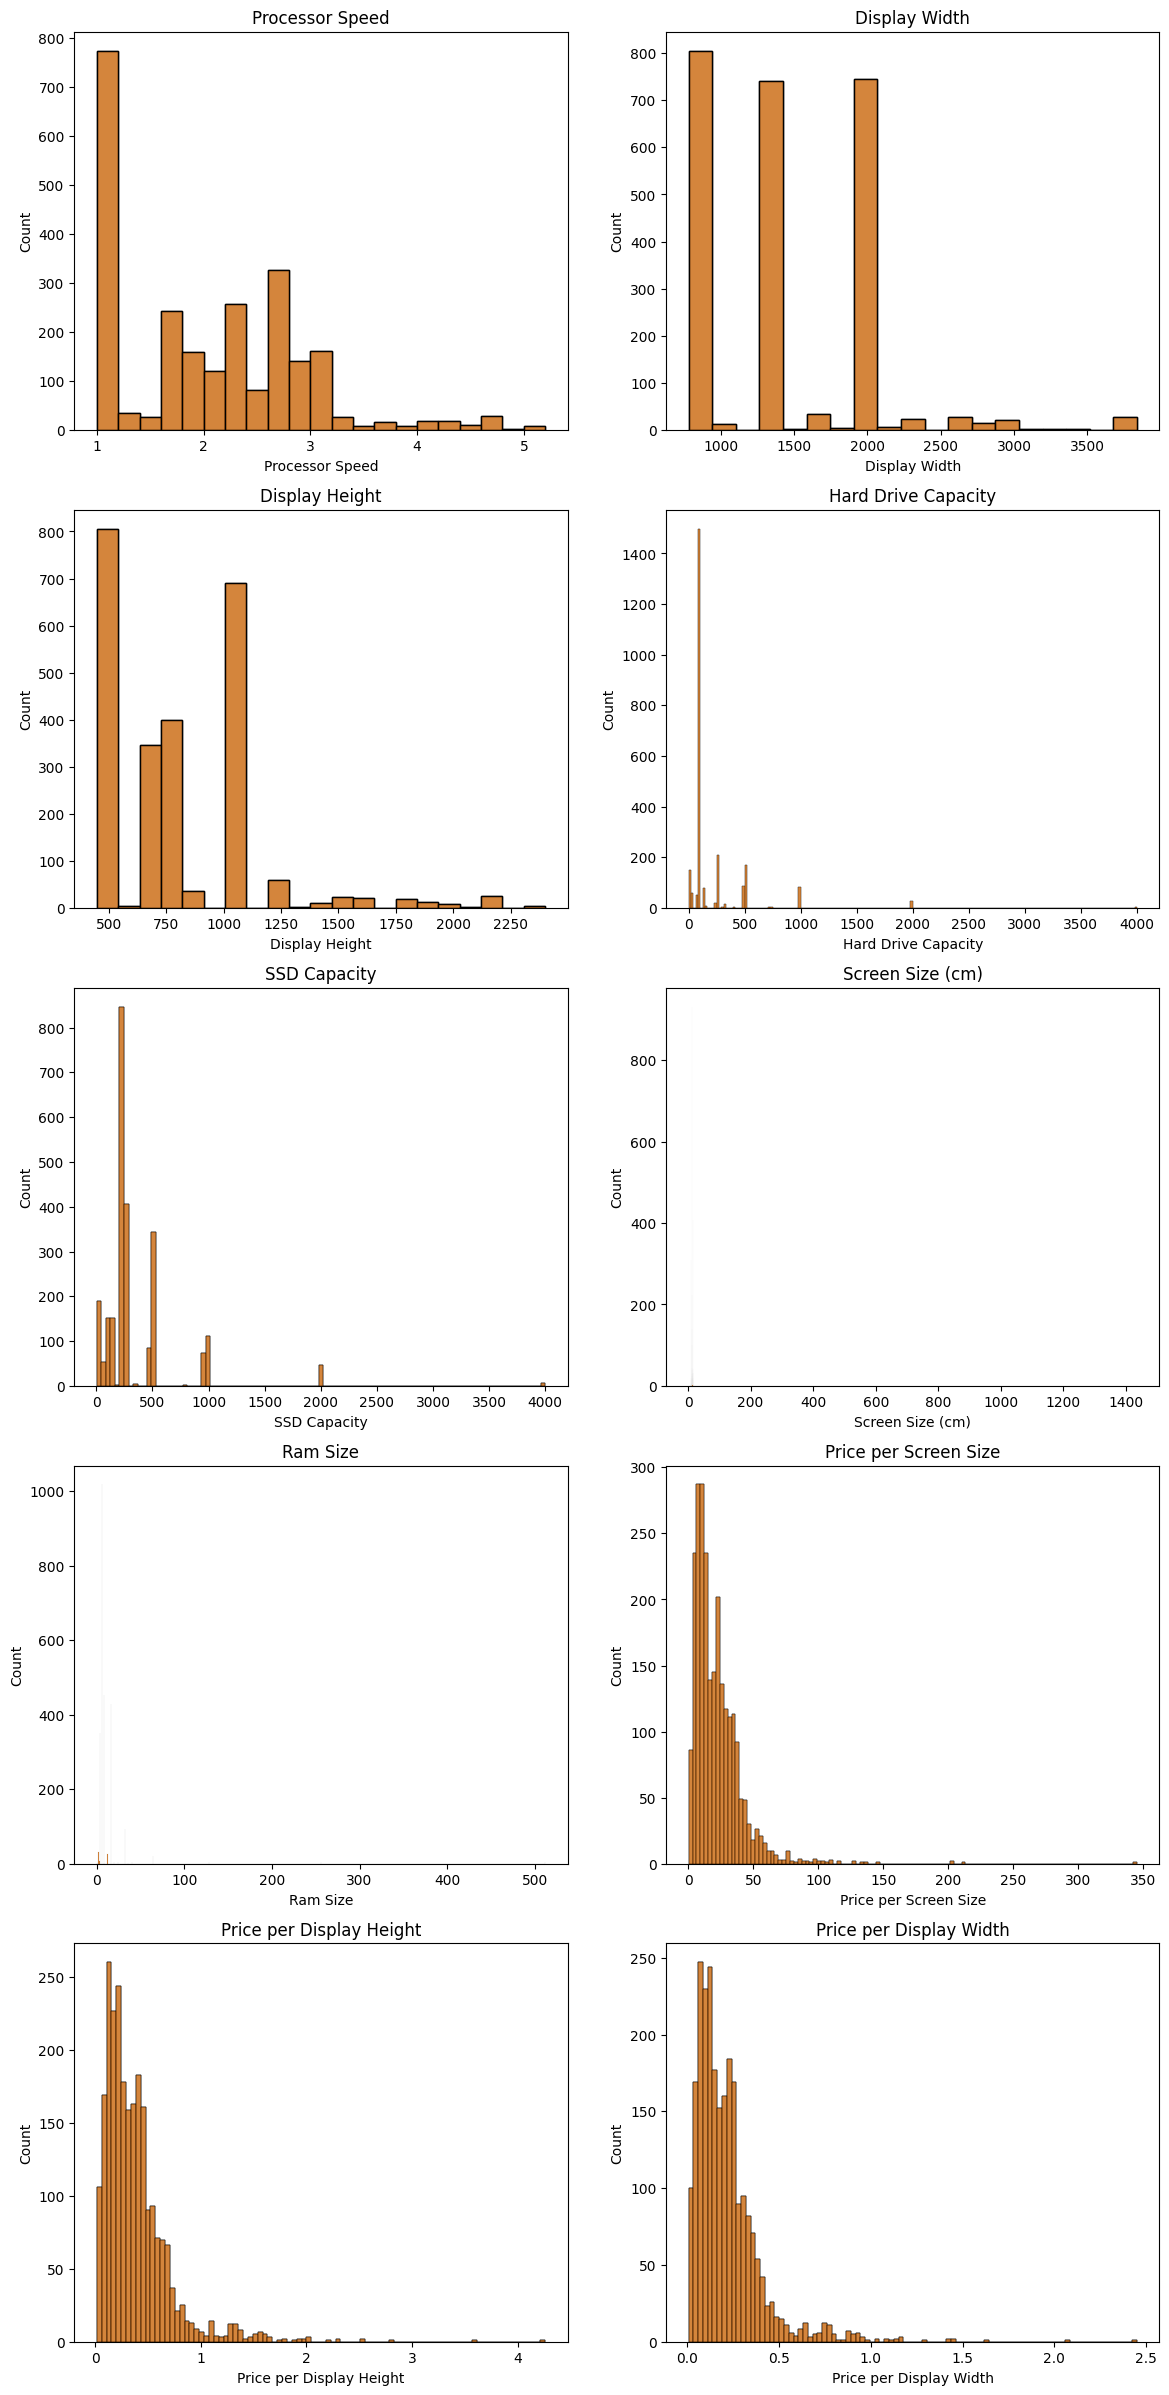

In [19]:
# Determine how many plots you need (one per feature excluding "Price")
features = ds_num.drop(columns=["Price"]).columns
n_features = len(features)

# Show feature distribution 
ncols = 2
nrows = (n_features + ncols - 1) // ncols  # ceiling division

# Create suplots 
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 6 * nrows))
axes = axes.flatten()  # flatten to easily loop

# Iterate features to visualise data with histplot
for i, feature in enumerate(ds_num.drop(columns=["Price"]).columns): 
    for j in range(ncols):
        sns.histplot(data=ds_num[feature], ax=axes[i])
        axes[i].set_title(f"{feature}")

# Remove blank plots 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # delete the unused axes


In [20]:
ds_num["Processor Speed"].value_counts()

Processor Speed
1.186174    657
2.600000    244
1.600000    158
2.400000    149
3.000000    127
2.800000    123
1.100000    108
2.300000     82
1.700000     79
2.700000     77
1.900000     71
2.500000     71
1.800000     52
2.000000     50
3.100000     35
2.100000     35
2.160000     34
1.990000     31
1.200000     23
2.200000     23
2.900000     17
4.700000     16
3.300000     15
4.200000     14
1.400000     11
4.000000     10
1.300000     10
3.600000     10
3.500000      9
4.100000      9
3.900000      9
1.000000      9
1.490000      9
4.400000      8
2.480000      8
4.600000      8
3.400000      8
5.000000      6
4.800000      5
1.660000      5
1.500000      5
4.300000      5
3.200000      4
1.830000      4
4.500000      3
2.260000      3
3.800000      3
2.660000      3
3.700000      3
2.550000      2
2.670000      2
4.900000      2
5.100000      1
1.730000      1
1.460000      1
2.080000      1
1.860000      1
1.230000      1
5.200000      1
Name: count, dtype: int64

Features for MinMax: Processor Speed, Hard Drive Capacity, SSD, Screen Size, Ram

In [21]:
ds_num

,Price,Processor Speed,Display Width,Display Height,Hard Drive Capacity,SSD Capacity,Screen Size (cm),Ram Size,Price per Screen Size,Price per Display Height,Price per Display Width
0,400.00,4.200000,1920.000000,1080.000000,2000.00,205.95,14.000000,5.98,28.571429,0.370370,0.208333
1,175.00,2.400000,1920.000000,1080.000000,500.00,500.00,14.000000,16.00,12.500000,0.162037,0.091146
2,85.00,2.400000,1366.000000,768.000000,16.00,205.95,11.600000,4.00,7.327586,0.110677,0.062225
3,101.25,1.400000,1366.000000,768.000000,98.89,256.00,12.500000,8.00,8.100000,0.131836,0.074122
4,50.00,1.600000,1366.000000,768.000000,98.89,16.00,11.600000,4.00,4.310345,0.065104,0.036603
...,...,...,...,...,...,...,...,...,...,...,...
2466,429.00,2.600000,1280.000000,720.000000,98.89,960.00,14.000000,5.98,30.642857,0.595833,0.335156
2467,93.25,1.186174,779.242171,447.949319,98.89,205.95,9.076586,5.98,10.273686,0.208171,0.119668
2468,424.80,2.800000,1920.000000,1080.000000,98.89,120.00,12.500000,5.98,33.984000,0.393333,0.221250
2469,90.94,1.186174,779.242171,447.949319,98.89,205.95,9.076586,5.98,10.019185,0.203014,0.116703


In [22]:
# Normalize all features using MinMax
# Create a normalizer object 
minmax_scaler = FeatureScaler(scaler_type="MinMax")

# Apply normalization on each feature distinctly 
ds_num["Processor Speed"] = minmax_scaler.transform(ds_num[["Processor Speed"]])
ds_num["SSD Capacity"] = minmax_scaler.transform(ds_num[["SSD Capacity"]])
ds_num["Display Width"] = minmax_scaler.transform(ds_num[["Display Width"]])
ds_num["Display Height"] = minmax_scaler.transform(ds_num[["Display Height"]])
ds_num["Hard Drive Capacity"] = minmax_scaler.transform(ds_num[["Hard Drive Capacity"]])
ds_num["Screen Size (cm)"] = minmax_scaler.transform(ds_num[["Screen Size (cm)"]])
ds_num["Ram Size"] = minmax_scaler.transform(ds_num[["Ram Size"]])
ds_num["Hard Drive Capacity"] = minmax_scaler.transform(ds_num[["Hard Drive Capacity"]])
ds_num["Price per Screen Size"] = minmax_scaler.transform(ds_num[["Price per Screen Size"]])
ds_num["Price per Display Height"] = minmax_scaler.transform(ds_num[["Price per Display Height"]])
ds_num["Price per Display Width"] = minmax_scaler.transform(ds_num[["Price per Display Width"]])


Feature Scaling has succesfully accomplished
Feature Scaling has succesfully accomplished
Feature Scaling has succesfully accomplished
Feature Scaling has succesfully accomplished
Feature Scaling has succesfully accomplished
Feature Scaling has succesfully accomplished
Feature Scaling has succesfully accomplished
Feature Scaling has succesfully accomplished
Feature Scaling has succesfully accomplished
Feature Scaling has succesfully accomplished
Feature Scaling has succesfully accomplished


In [23]:
ds_num

,Price,Processor Speed,Display Width,Display Height,Hard Drive Capacity,SSD Capacity,Screen Size (cm),Ram Size,Price per Screen Size,Price per Display Height,Price per Display Width
0,400.00,0.761905,0.372704,0.323788,0.499875,0.050538,0.008374,0.011680,0.082472,0.083832,0.082026
1,175.00,0.333333,0.372704,0.323788,0.124781,0.124124,0.008374,0.031250,0.035871,0.034781,0.034033
2,85.00,0.333333,0.191703,0.163956,0.003751,0.050538,0.006699,0.007812,0.020872,0.022689,0.022189
3,101.25,0.095238,0.191703,0.163956,0.024479,0.063063,0.007327,0.015625,0.023112,0.027671,0.027061
4,50.00,0.142857,0.191703,0.163956,0.024479,0.003003,0.006699,0.007812,0.012124,0.011959,0.011696
...,...,...,...,...,...,...,...,...,...,...,...
2466,429.00,0.380952,0.163606,0.139367,0.024479,0.239239,0.008374,0.011680,0.088478,0.136915,0.133965
2467,93.25,0.044327,0.000000,0.000000,0.024479,0.050538,0.004938,0.011680,0.029415,0.045643,0.045714
2468,424.80,0.428571,0.372704,0.323788,0.024479,0.029029,0.007327,0.011680,0.098166,0.089238,0.087316
2469,90.94,0.044327,0.000000,0.000000,0.024479,0.050538,0.004938,0.011680,0.028677,0.044429,0.044500


## Feature Transformation

In [24]:
from feature_engineering import correlation_graph

Showing feature analysis by comparing features with target laptop prices 

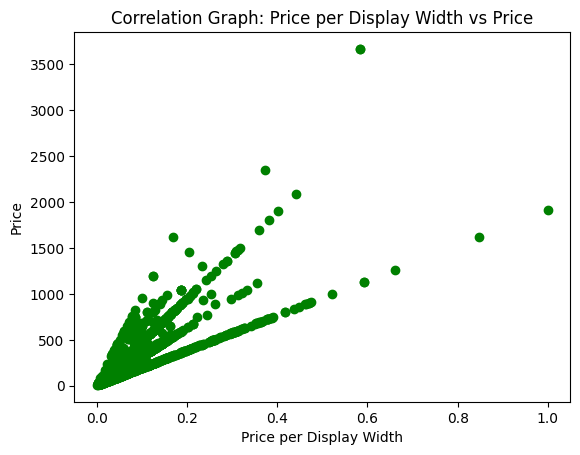

In [25]:
## Show correlation graph among two independent features
# correlation_graph(ds_num, x="Processor Speed")
# correlation_graph(ds_num, x="Display Width")
# correlation_graph(ds_num, x="Display Height", color = "purple")

# correlation_graph(ds_num, x="Hard Drive Capacity")
# correlation_graph(ds_num, x="SSD Capacity", color = "purple")

# correlation_graph(ds_num, x="Screen Size (cm)")
# correlation_graph(ds_num, x="Ram Size", color = "green")

# correlation_graph(ds_num, x="Price per Display Height")
correlation_graph(ds_num, x="Price per Display Width", color = "green")

Feature for applying feature transformation: 
- Ram Size
- Screen Size (cm)

Note: applying feature transformation is useful after initial training of the model with existing features and finding outliers that are whether relevant or irrelevant

## Feature Engineering: Final Step

In [26]:
# Drop and recreate price data 
price = ds_num[["Price"]]
ds_num = ds_num.drop(columns=["Price"], axis=1)

# Combine numerical features with categorical features 
laptop_ds = pd.concat([ds_cat, ds_num], axis=1)

In [28]:
laptop_ds
laptop_ds.to_csv("laptop_price_ds_for_model_training.csv")